## Observations and Insights 

###The following observations regarding the mouse drug regimen study of the ten drugs(including placebo) over a period of 45 days:

There did seem to be a correlation with mice treated with the Capomulin regime and their weights and average tumor volumes. The correlation coefficient is 0.84, indicating a strong correlation. Thus, a heavier mouse generally exhibited larger average tumor volumes. 

Timepoint measurements over the course of the study suggest the mice treated with Capomulin and Ramicane performed similarly well in life span over the treatment. They had the lengthiest spans compared to other treatments. Seven of the treatments generally didn't seem to perform any better than the placebo in this regard.

Capmulin and Ramicane also seemed to demonstrate the lowest average tumor volumes at the final timepoints for the mice in the study as compared to other drugs(and placebo). The median final tumor volume of Capomulin treated mice was: 38.125164 and the median final tumor volume of Ramicane treated mice was 36.561652. An examination of individual mice treated with Capomulin seem to demonstrate lower tumor volumes by their final timepoint over the course of the study as compared to their tumor volume at the start of the study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(merge_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_merge_df = merge_df[merge_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
group_merge_df = merge_df.groupby(["Mouse ID"])
print(group_merge_df)

In [5]:
g989mouse = group_merge_df.groups["g989"]
g989mouse = group_merge_df.get_group("g989")
g989mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df.drop(merge_df[ merge_df["Mouse ID"] == "g989" ].index , inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(merge_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_df = merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
group_summary_df = summary_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
group_summary_df.head(15)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

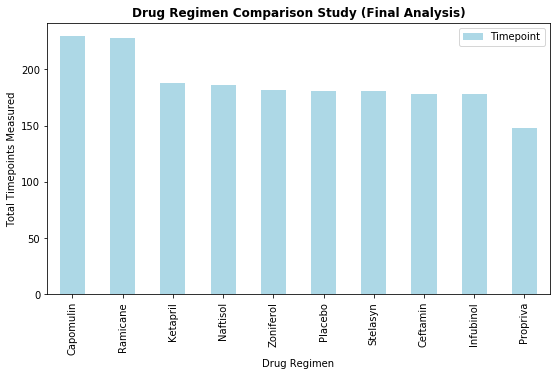

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Isolate data with groupby and sort data 
mice_drug_count = merge_df[["Drug Regimen","Timepoint"]]
gr_mice_drug_count = mice_drug_count.groupby(["Drug Regimen"]).count()
gr_mice_drug_count = gr_mice_drug_count.sort_values(["Timepoint"], ascending=False)

# plot figuresize, x and y axis and titles
gr_mice_drug_count.plot(kind="bar", color= "lightblue", figsize=(9,5))
plt.title("Drug Regimen Comparison Study (Final Analysis)", fontdict={"fontweight":"bold", "fontsize": 12}) 
plt.ylabel("Total Timepoints Measured")
plt.show()

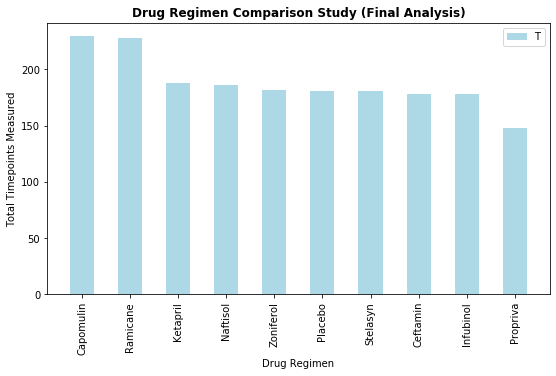

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Isolate data with groupby and sort data 
mice_drug_count = merge_df[["Drug Regimen","Timepoint"]]
gr_mice_drug_count = mice_drug_count.groupby(["Drug Regimen"]).count()
gr_mice_drug_count = gr_mice_drug_count.sort_values(["Timepoint"], ascending=False)

# reset index
resetgr_mice_drug_count = gr_mice_drug_count.reset_index()

# plot figuresize, x and y axis, tick locations, bar width, titles and legend
plt.figure(figsize=(9,5))
tick_locations = [value for value in resetgr_mice_drug_count["Drug Regimen"]]
plt.bar(resetgr_mice_drug_count["Drug Regimen"], resetgr_mice_drug_count["Timepoint"], color= "lightblue", width= 0.50)
plt.xticks(tick_locations, resetgr_mice_drug_count["Drug Regimen"], rotation="vertical")
plt.title("Drug Regimen Comparison Study (Final Analysis)",fontdict={"fontweight":"bold", "fontsize": 12})
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints Measured")
plt.legend("Timepoint")

plt.show()

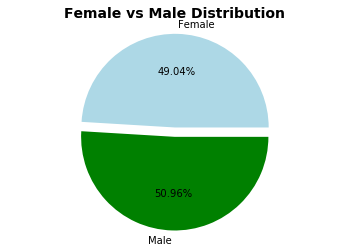

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_merge = merge_df[["Sex", "Timepoint"]]
gr_sex_merge = sex_merge.groupby(["Sex"]).count()
colors = ["lightblue", "green"]
explode = (0.1,0)
gr_sex_merge.plot(kind='pie', subplots=True, legend=False, colors=colors, autopct="%.2f%%", explode=explode)
plt.ylabel("")
plt.title("Female vs Male Distribution", fontdict={"fontweight":"bold", "fontsize": 14})

plt.axis('equal')
plt.show()


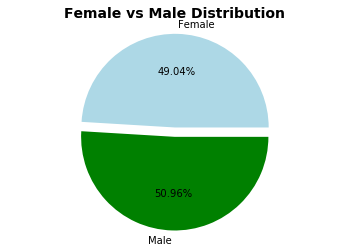

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

females = merge_df.loc[merge_df["Sex"] == "Female"].count()[0]
males = merge_df.loc[merge_df["Sex"] == "Male"].count()[0]

labels = ["Female", "Male"]
colors = ["lightblue", "green"]
explode = (0.1,0)
plt.pie([females, males], labels=labels, colors=colors, autopct="%.2f%%", explode=explode)
plt.axis("equal")
plt.title("Female vs Male Distribution", fontdict={"fontweight":"bold", "fontsize": 14})
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# create dataframe for data needed
finaltumordf = merge_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# use groupby to isolate final timepoints and tumor volumes for each mouse using .last
grfinaltumor = finaltumordf.groupby(["Mouse ID"]).last()
grfinaltumor.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a262,Placebo,45,70.717621
a275,Ceftamin,45,62.999356
a366,Stelasyn,30,63.440686


In [15]:
# create treatment variables and find the mice for each drug regimen and provide data for plotting
capomulin = grfinaltumor.loc[grfinaltumor["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = grfinaltumor.loc[grfinaltumor["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = grfinaltumor.loc[grfinaltumor["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = grfinaltumor.loc[grfinaltumor["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Determine outliers using upper and lower bounds

drugs = [capomulin, ramicane, infubinol, ceftamin]
y = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Use pandas to give quartile calculations and outliers for drug regimens using 'for loop'

for x in drugs:
    
    quartiles = x.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print("The results in order for "+ ":",y)
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median of is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.") 
    print("------------------------------------------------------") 

The results in order for : ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median of is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------
The results in order for : ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median of is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------
The results in order for : ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median of is: 60.16518046 
Values 

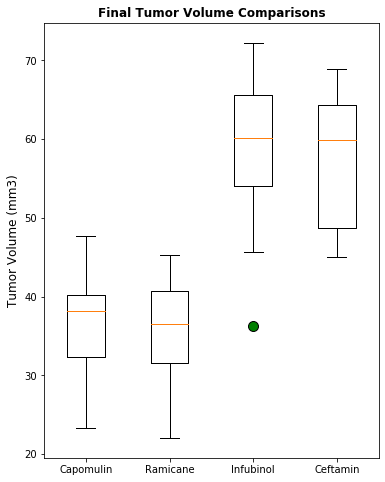

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(6,8))
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
flierprops = dict(marker="o", markerfacecolor= "g", markersize=10)

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=labels, flierprops=flierprops)
plt.title("Final Tumor Volume Comparisons", fontdict={"fontweight":"bold", "fontsize": 12}) 
plt.ylabel("Tumor Volume (mm3)", fontdict={"fontsize": 12})

plt.show()

## Line and Scatter Plots

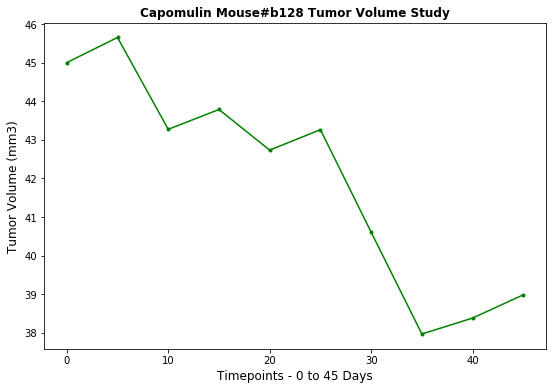

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(9,6))

# locate mouse for study - one variable for tumor volume and one for timepoint 
b128mousetumor = merge_df.loc[merge_df["Mouse ID"] == "b128"]["Tumor Volume (mm3)"]
b128mousetime = merge_df.loc[merge_df["Mouse ID"] == "b128"]["Timepoint"]

#plot variables with x,y axis and line color and labels/titles
plt.plot(b128mousetime,b128mousetumor, "g.-") 
plt.title("Capomulin Mouse#b128 Tumor Volume Study", fontdict={"fontweight":"bold", "fontsize": 12})
plt.xlabel("Timepoints - 0 to 45 Days", fontdict={"fontsize": 12})
plt.ylabel("Tumor Volume (mm3)", fontdict={"fontsize": 12})

plt.show()

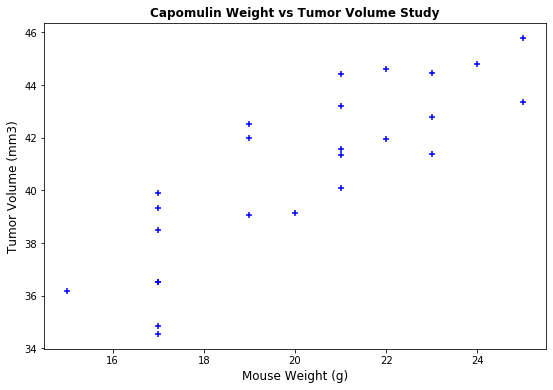

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#create dataframe/groupby to get average tumor volumes for each mouse and weights
avgtumordf = merge_df[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
gravgtumordf = avgtumordf.groupby(["Mouse ID", "Drug Regimen"]).mean()

#reset index
resetavgtumordf = gravgtumordf.reset_index()

#adjust figure size to enlarge
plt.figure(figsize=(9,6))

#locate mouse weights on Capomulin regimen
weights = resetavgtumordf.loc[resetavgtumordf["Drug Regimen"] == "Capomulin"]["Weight (g)"]

#locate mouse average tumor volumes on Capomulin regimen
tumors = resetavgtumordf.loc[resetavgtumordf["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

# label title, x and y axis, fontsizes
plt.title("Capomulin Weight vs Tumor Volume Study", fontdict={"fontweight":"bold", "fontsize": 12})
plt.xlabel("Mouse Weight (g)", fontdict={"fontsize": 12})
plt.ylabel("Tumor Volume (mm3)", fontdict={"fontsize": 12})
plt.scatter(weights, tumors, marker="+", color="b")
plt.show()

## Correlation and Regression

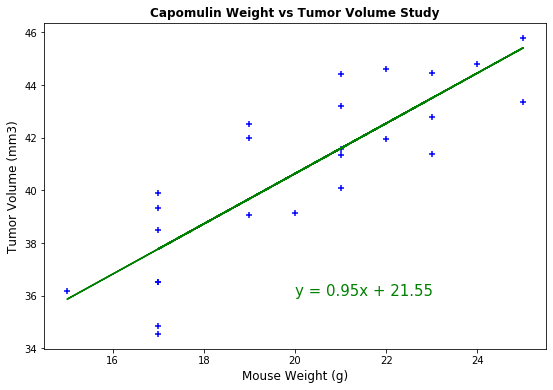

The correlation coefficient between Capomulin mice weights and their tumor volume is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# adjust figure size to enlarge
plt.figure(figsize=(9,6))

# locate mouse weights on Capomulin regimen
weights = resetavgtumordf.loc[resetavgtumordf["Drug Regimen"] == "Capomulin"]["Weight (g)"]

# locate mouse average tumor volumes on Capomulin regimen
tumors = resetavgtumordf.loc[resetavgtumordf["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

# line regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, tumors)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# label title, x and y axis, fontsizes
plt.title("Capomulin Weight vs Tumor Volume Study", fontdict={"fontweight":"bold", "fontsize": 12})
plt.xlabel("Mouse Weight (g)", fontdict={"fontsize": 12})
plt.ylabel("Tumor Volume (mm3)", fontdict={"fontsize": 12})

# plot and adjustments to marker style and color
plt.scatter(weights, tumors, marker="+", color="b")
plt.plot(weights, regress_values,"g-")
plt.annotate(line_eq,(20,36),fontsize=15,color="g")
plt.show()

# Calculate the correlation coefficient between mouse weights and tumor volume
print(f"The correlation coefficient between Capomulin mice weights and their tumor volume is {round(st.pearsonr(weights,tumors)[0],2)}")